# Clustering Crypto

In [461]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from pandas.io.json import json_normalize


### Fetching Cryptocurrency Data

In [462]:
api_key = "320d3649d072d10f295c182cd1f3b068e4726ba8a78289d1e1881718b8d30d0d"

url = "https://min-api.cryptocompare.com/data/all/coinlist"

import requests


In [463]:
# Creating a DataFrame
res = requests.get(url)
res = res.json()
df_res = pd.DataFrame.from_dict(res)
df_res.head()

,Response,Message,Data,BaseImageUrl,BaseLinkUrl,RateLimit,HasWarning,Type
007,Success,Coin list succesfully returned!,"{'Id': '5294', 'Url': '/coins/007/overview', '...",https://www.cryptocompare.com,https://www.cryptocompare.com,NaN,False,100
0XBTC,Success,Coin list succesfully returned!,"{'Id': '877383', 'Url': '/coins/0xbtc/overview...",https://www.cryptocompare.com,https://www.cryptocompare.com,NaN,False,100
0xDIARY,Success,Coin list succesfully returned!,"{'Id': '913090', 'Url': '/coins/0xdiary/overvi...",https://www.cryptocompare.com,https://www.cryptocompare.com,NaN,False,100
1337,Success,Coin list succesfully returned!,"{'Id': '20824', 'Url': '/coins/1337/overview',...",https://www.cryptocompare.com,https://www.cryptocompare.com,NaN,False,100
1CR,Success,Coin list succesfully returned!,"{'Id': '5406', 'Url': '/coins/1cr/overview', '...",https://www.cryptocompare.com,https://www.cryptocompare.com,NaN,False,100


In [464]:
df = json_normalize(df_res['Data'])
df.head()

,Algorithm,BlockNumber,BlockReward,BlockTime,BuiltOn,CoinName,ContentCreatedOn,FullName,FullyPremined,Id,...,Taxonomy.CollateralType,Taxonomy.CollateralizedAsset,Taxonomy.CollateralizedAssetType,Taxonomy.FCA,Taxonomy.FINMA,Taxonomy.Industry,TotalCoinSupply,TotalCoinsFreeFloat,TotalCoinsMined,Url
0,Scrypt,NaN,NaN,NaN,N/A,007 coin,1430209551,007 coin (007),0,5294,...,,,,,,,989800,N/A,NaN,/coins/007/overview
1,N/A,0.0,0.0,0.0,7605,0xBitcoin,1525792954,0xBitcoin (0xBTC),0,877383,...,,,,,,,21000000,N/A,2.099998e+07,/coins/0xbtc/overview
2,N/A,NaN,NaN,NaN,7605,The 0xDiary Token,1530540488,The 0xDiary Token (0xDIARY),0,913090,...,,,,,,,1000000,N/A,NaN,/coins/0xdiary/overview
3,X13,2259647.0,0.0,60.0,N/A,EliteCoin,1465838687,EliteCoin (1337),0,20824,...,,,,,,,314159265359,N/A,2.931196e+10,/coins/1337/overview
4,Scrypt,0.0,0.0,0.0,N/A,1Credit,1430211162,1Credit (1CR),0,5406,...,,,,,,,92000000000,N/A,8.821300e+04,/coins/1cr/overview


In [465]:
df.columns

Index(['Algorithm', 'BlockNumber', 'BlockReward', 'BlockTime', 'BuiltOn',
       'CoinName', 'ContentCreatedOn', 'FullName', 'FullyPremined', 'Id',
       'ImageUrl', 'IsTrading', 'Name', 'NetHashesPerSecond', 'PreMinedValue',
       'ProofType', 'SmartContractAddress', 'SortOrder', 'Sponsored', 'Symbol',
       'Taxonomy.Access', 'Taxonomy.CollateralInfo', 'Taxonomy.CollateralType',
       'Taxonomy.CollateralizedAsset', 'Taxonomy.CollateralizedAssetType',
       'Taxonomy.FCA', 'Taxonomy.FINMA', 'Taxonomy.Industry',
       'TotalCoinSupply', 'TotalCoinsFreeFloat', 'TotalCoinsMined', 'Url'],
      dtype='object')

In [466]:
df_c = df.drop(columns=['Taxonomy.Access', 'Taxonomy.CollateralInfo', 'Taxonomy.CollateralType',
       'Taxonomy.CollateralizedAsset', 'Taxonomy.CollateralizedAssetType',
       'Taxonomy.FCA', 'Taxonomy.FINMA', 'Taxonomy.Industry'])

# Get names of indexes for which column Algorithm has value "N/A"
NoAlgorithm = df_c[ df_c['Algorithm'] == "N/A" ].index
# Delete these row indexes from dataFrame
df_c.drop(NoAlgorithm, inplace=True)

# Get names of indexes for which column IsTrading has value "False"
NoTrading = df_c[ df_c['IsTrading'] == False ].index 
# Delete these row indexes from dataFrame
df_c.drop(NoTrading, inplace=True)

# Get names of indexes for which column TotalCoinsMined has value "NaN", zero or less.
# Delete these row indexes from dataFrame
df_c = df_c[pd.notnull(df_c["TotalCoinsMined"])]
NoCoinMined = df_c[ df_c["TotalCoinsMined"] <= 0 ].index 
df_c.drop(NoCoinMined, inplace=True)

# Get names of indexes for which column has value "N/A"
NA_TotalCoinSupply = df_c[ df_c["TotalCoinSupply"] == "N/A" ].index
# Delete these row indexes from dataFrame
df_c.drop(NA_TotalCoinSupply, inplace=True)

# Get names of indexes for which column has value "N/A"
NA_ProofType = df_c[ df_c["ProofType"] == "N/A" ].index
# Delete these row indexes from dataFrame
df_c.drop(NA_ProofType, inplace=True)


In [467]:
#Drop unnecesary columns
df_c.drop(columns=['IsTrading', 'PreMinedValue', 'TotalCoinsFreeFloat'], inplace=True)
coins_names = df_c.set_index('CoinName')
X = coins_names.drop(columns=['Url', 'Symbol', 'SmartContractAddress', 'Name', 'ImageUrl', 'Id', 'FullName', 'BuiltOn'])

In [468]:
X = pd.get_dummies(X, columns=["Algorithm", "ProofType", "Sponsored"])
X["TotalCoinSupply"] = pd.to_numeric(X["TotalCoinSupply"])

In [469]:
X.head()

,BlockNumber,BlockReward,BlockTime,ContentCreatedOn,FullyPremined,NetHashesPerSecond,SortOrder,TotalCoinSupply,TotalCoinsMined,Algorithm_1GB AES Pattern Search,...,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW,Sponsored_False
CoinName,,,,,,,,,,,,,,,,,,,,,
EliteCoin,2259647.0,0.0,60.0,1465838687,0,0.0,577,3.141593e+11,2.931196e+10,0,...,0,0,0,0,0,0,0,0,0,1
1Credit,0.0,0.0,0.0,1430211162,0,0.0,374,9.200000e+10,8.821300e+04,0,...,0,0,0,0,0,0,0,0,0,1
42 Coin,147668.0,0.0,0.0,1427211129,0,0.0,34,4.200000e+01,4.199995e+01,0,...,0,0,0,0,0,0,0,0,0,1
8BIT Coin,0.0,0.0,0.0,1430210081,0,0.0,295,0.000000e+00,1.467841e+06,0,...,0,0,0,0,0,0,0,0,0,1
Acute Angle Cloud,0.0,0.0,0.0,1535106240,0,0.0,3271,1.000000e+09,1.000000e+09,0,...,0,0,0,0,0,0,0,0,0,1


In [470]:
# Fit the Standard Scaler with the training data
X_scaled = StandardScaler().fit_transform(X)

In [471]:
print(X_scaled[0:5])

[[ 0.34815168 -0.07426215 -0.07544957 -0.38742141 -0.20810355 -0.08571019
  -0.6569928   4.48062052  0.52327272 -0.04347826 -0.04347826 -0.04347826
  -0.06154575 -0.07544932 -0.04347826 -0.06154575 -0.06154575 -0.04347826
  -0.04347826 -0.19282634 -0.06154575 -0.09759001 -0.04347826 -0.04347826
  -0.11569063 -0.07544932 -0.04347826 -0.04347826 -0.15220389 -0.04347826
  -0.13143239 -0.04347826 -0.04347826 -0.08720414 -0.04347826 -0.04347826
  -0.04347826 -0.04347826 -0.06154575 -0.04347826 -0.07544932 -0.08720414
  -0.08720414 -0.04347826 -0.13867505 -0.13867505 -0.13867505 -0.04347826
  -0.04347826 -0.04347826 -0.07544932 -0.1875     -0.04347826 -0.04347826
  -0.04347826 -0.07544932 -0.16471728 -0.31194309 -0.04347826 -0.08720414
  -0.07544932 -0.06154575 -0.71713717 -0.04347826 -0.04347826 -0.06154575
  -0.04347826 -0.04347826 -0.04347826 -0.04347826 -0.04347826 -0.04347826
  -0.04347826 -0.04347826 -0.39967164 -0.04347826  5.66789202 -0.04347826
  -0.08720414 -0.08720414 -0.10700646 

In [472]:
### Initialize PCA model
pca = PCA(n_components=3)

# Get two principal components for the data.
X_pca = pca.fit_transform(X_scaled)

In [473]:
# Transform PCA data to a DataFrame
df_X_pca = pd.DataFrame(
    data=X_pca, columns=["principal component 1", "principal component 2", "principal component 3"]
)
df_X_pca.head()

,principal component 1,principal component 2,principal component 3
0,1.443462,1.972345,0.165555
1,-0.489961,1.469055,-1.031828
2,-1.388098,1.488561,0.123529
3,-1.289630,1.345886,0.135833
4,2.892158,-7.133668,1.772247


In [474]:
#Add Coin Name as an index
n = 3
column_name = [f"PC{i}" for i in range(1, n + 1)]
pcs_df = pd.DataFrame(data=X_pca, columns=column_name, index=X.index)
print(pcs_df.shape)
pcs_df.head()

(530, 3)


,PC1,PC2,PC3
CoinName,,,
EliteCoin,1.443462,1.972345,0.165555
1Credit,-0.489961,1.469055,-1.031828
42 Coin,-1.388098,1.488561,0.123529
8BIT Coin,-1.289630,1.345886,0.135833
Acute Angle Cloud,2.892158,-7.133668,1.772247


In [475]:
#Calculate the inertia for the range of k values

inertia = []
k = list(range(1, 11))

for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(pcs_df)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.hvplot.line(x="k", y="inertia", xticks=k, title="Elbow Curve")

:Curve   [k]   (inertia)

In [476]:
 def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Fit the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data

In [477]:
# Looking for clusters the first best value of k
seven_clusters = get_clusters(7, pcs_df)
seven_clusters.head()

,PC1,PC2,PC3,class
CoinName,,,,
EliteCoin,1.443462,1.972345,0.165555,2
1Credit,-0.489961,1.469055,-1.031828,2
42 Coin,-1.388098,1.488561,0.123529,2
8BIT Coin,-1.289630,1.345886,0.135833,2
Acute Angle Cloud,2.892158,-7.133668,1.772247,1


In [478]:
#Concatenating df
clustered_df = pd.concat([seven_clusters, coins_names[["Algorithm", "ProofType", "TotalCoinsMined", "TotalCoinSupply",]]],axis=1)

                                                      
clustered_df.reset_index(inplace=True)                                                   
clustered_df.head()


,CoinName,PC1,PC2,PC3,class,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,EliteCoin,1.443462,1.972345,0.165555,2,X13,PoW/PoS,2.931196e+10,314159265359
1,1Credit,-0.489961,1.469055,-1.031828,2,Scrypt,PoW,8.821300e+04,92000000000
2,42 Coin,-1.388098,1.488561,0.123529,2,Scrypt,PoW/PoS,4.199995e+01,42
3,8BIT Coin,-1.289630,1.345886,0.135833,2,Scrypt,PoW/PoS,1.467841e+06,0
4,Acute Angle Cloud,2.892158,-7.133668,1.772247,1,ECC 256K1,DPOS,1.000000e+09,1000000000


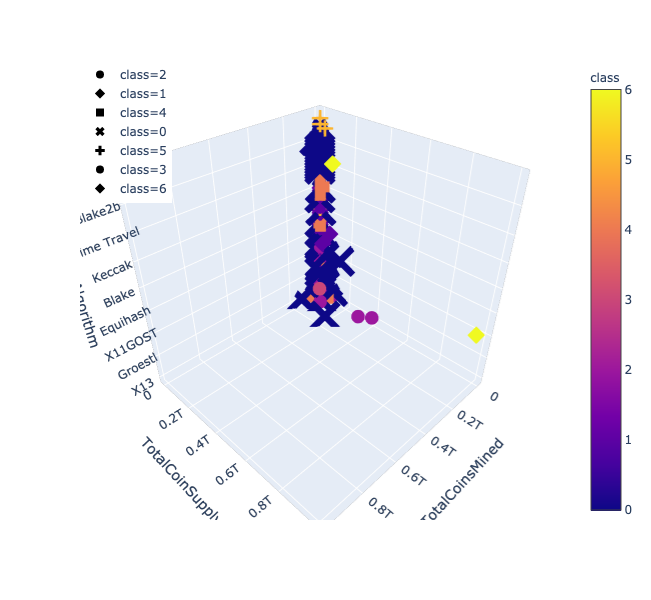

In [479]:
# Plotting the 3D-Scatter with x="Annual Income", y="Spending Score (1-100)" and z="Age"
fig = px.scatter_3d(
    clustered_df,
    x="TotalCoinsMined",
    y="TotalCoinSupply",
    z="Algorithm",
    color="class",
    symbol="class",
    width=800,
    hover_name="CoinName",
    hover_data=["Algorithm"]
)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()

#### Table of Tradable Cryptocurrencies

In [481]:
# Table with tradable cryptos
clustered_df["TotalCoinSupply"] = pd.to_numeric(clustered_df["TotalCoinSupply"])
clustered_df.hvplot.table(["CoinName", "Algorithm", "ProofType", "TotalCoinSupply", "TotalCoinsMined", "class"], width=420)

:Table   [CoinName,Algorithm,ProofType,TotalCoinSupply,TotalCoinsMined,class]

#### Scatter Plot with Tradable Cryptocurrencies

In [484]:
# Scaling data to create the scatter plot
clustered_df.hvplot.scatter(x='TotalCoinsMined', y="TotalCoinSupply", hover_cols=["CoinName"])
# Plot the scatter with x="TotalCoinsMined" and y="TotalCoinSupply"

:Scatter   [TotalCoinsMined]   (TotalCoinSupply,CoinName)